## Sentiment Analysis 

### TM 2021-2022 

- . Ana Portugal m20210671
- . Carolina Machado m20210676
- . Francisco Calha m20210673
- . Sara Arana m20210672

### Libraries 

#### Normal Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

#### Pre-Processing  Libraries

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarax\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarax\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sarax\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarax\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
import string

#### Feature Extraction Libraries

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#### Machine Learning Models Libraries

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

#### Deep Learning Model 

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers 
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Activation,Flatten
from keras import layers
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

#### Score Libraries 

In [7]:
from sklearn.metrics import f1_score, make_scorer,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Loading Data 

In [8]:
dataframe = pd.read_csv('C:/Users/sarax/Desktop/tm/Project/training_set.txt', delimiter = "\t")
dataframe.head()

,sentence,emotion
0,I'm too old to be traded in .,6
1,Mother said you could always tell a lady by he...,8
2,I always said I'd leave off when the time came .,6
3,He'll be safe with me .,2
4,Lay off .,1


In [9]:
df_dev = pd.read_csv('C:/Users/sarax/Desktop/tm/Project/dev_set.txt', delimiter = "\t")
df_dev.head()

,sentence,emotion
0,What happens to the gold in our safe ?,4
1,Natural to get cold feet .,8
2,"Not very lucky , is he ?",7
3,I'm just a little anxious to get up there and ...,2
4,Did you think we don't know about your affair ...,1


<AxesSubplot:>

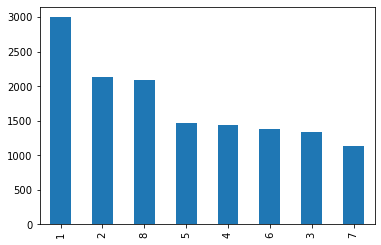

In [10]:
dataframe['emotion'].value_counts().plot.bar()

## Pre-Processing

#### Missing Values

In [11]:
dataframe.isna().sum()

sentence    0
emotion     0
dtype: int64

#### Lematizing

In [12]:
lemma = WordNetLemmatizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return  " ".join(lemma.lemmatize(word) for word in text.split())

In [13]:
def pre_processing(dataframe):
 
    #-------------------------------------------------------------------------
    # some words will still appear like "he'll", "i'd", ... when removed stop 
    # words we didn't found a function like stop words that could extract them  
    # for us. Our strategy is subsitue first the "'" by an empty space. 
    # "he'll" --> "he ll" and both 'words' will now be part of stop words.
    # ------------------------------------------------------------------------
    
    dataframe['sentence'] = dataframe['sentence'].str.replace("'"," ")
    
    dataframe['sentence'] = dataframe['sentence'].apply(lambda x: " ".join([char for char in x.split() if not char.isdigit()]))
    

#     dataframe['sentence'] = dataframe['sentence'].str.replace(r"[0-9]+,?([0-9]*)?",'[DIGIT]')
    
    stop = set(stopwords.words('english'))
    
    # removing any pontuaction but '!' and '?' because they can have meaning
    # for the emtion's classification
    exclude = set(filter(lambda n: n not in ['!','?'], string.punctuation))
    
    dataframe['sentence'] = dataframe['sentence'].apply(lambda x: " ".join([char for char in x.split() if char not in stop.union(exclude) ]))
    
    dataframe['sentence'] = dataframe['sentence'].str.lower()
    
    dataframe['sentence'] = dataframe['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    dataframe['sentence'] = dataframe['sentence'].apply(lambda x: " ".join([char for char in x.split() if not char.isdigit()]))
    
    dataframe['sentence'] = dataframe['sentence'].apply(lemmatize_text)
    
    return dataframe

In [14]:
df = dataframe.copy()
df = pre_processing(df)

In [15]:
df = df.drop(df.loc[df['sentence'] == ''].index)

### Train and Test

In [16]:
X_train = df['sentence']
y_train = df['emotion']

In [17]:
df_dev = pre_processing(df_dev)

X_dev =  df_dev['sentence']
y_dev = df_dev['emotion']

### Evaluate Model

In [18]:
def apply_classifier(model,X_train,y_train,X_dev,y_dev):
    y_train = np.array(y_train)
    model_ = model.fit(X_train,y_train)
    y_pred_dev = model_.predict(X_dev)
    f1_dev = f1_score(y_dev,y_pred_dev, average = 'micro')
    print('Dev F1 Score:', f1_dev)

## Feature Extraction 

### Bag of Words 

- . <b>Using Count Vectorizer <b>

In [19]:
cv = CountVectorizer(max_df=0.9, binary=True)

In [20]:
X_train_count = X_train.copy()
X_dev_count = X_dev.copy()

In [21]:
X_train_cv = cv.fit_transform(X_train_count) 
X_dev_cv = cv.transform(X_dev_count)

 <b>GridSearch  for Knn<b>

In [22]:
model_params_clf = {
    'KNN' : {
        'model' :KNeighborsClassifier(n_jobs=-1),
        'params':{
            'n_neighbors': [5,10,15,17,19,21,22,23,25],
            'weights': ['distance'],
            'algorithm' : ['brute','auto'],
            'metric': ['euclidean','cosine','jaccard']
        }
    }
}

In [23]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_cv,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [24]:
KNN_model = KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=22,weights='distance')

<b>GridSearch  for SVC<b>

In [25]:
model_params_clf = {
    'LinearSVC' : {
        'model' :svm.SVC(kernel='linear'),
        'params':{
            'C': [0.1,0.5, 0.7,1,1.2,1.5],
            'gamma': ['auto', 'scale']
        }
    }
}

In [26]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_cv,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [27]:
SVC_model = svm.SVC(C=0.7, gamma='auto', kernel='linear')

<b> GridSearch for LogisicRegression<b>

In [28]:
model_params_clf = {
    'Logistic' : {
        'model' :LogisticRegression(solver='lbfgs',multi_class='multinomial', random_state = 1, n_jobs=-1),
        'params':{
            'C': [0.1,0.5, 0.7,1,1.2,1.5]
        }
    }
}

In [29]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_cv,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [30]:
Multi_Logistic_model = LogisticRegression(C=1,multi_class='multinomial', n_jobs=-1, random_state=1)

<b> Multinomial Naive Bays <b>

We only want to test one parameter, so it's not necessary to do a Grid Search

In [31]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train_cv,y_train)
predict = mnb_model.predict(X_dev_cv)
score = f1_score(predict,y_dev, average = 'micro')
score

0.341

In [32]:
MNB_model = MultinomialNB(fit_prior=False)
MNB_model.fit(X_train_cv,y_train)
predict = MNB_model.predict(X_dev_cv)
score = f1_score(predict,y_dev, average = 'micro')
score

0.345

In [33]:
classifiers = [KNN_model, 
               SVC_model, 
               Multi_Logistic_model, 
               MNB_model, 
               StackingClassifier(estimators=[('Logistic',Multi_Logistic_model),('Multinomial',MNB_model)],cv=3, n_jobs = -1),
               GradientBoostingClassifier(random_state = 1),
               RandomForestClassifier(n_jobs=-1, random_state=1)]

In [34]:
for model in classifiers:
    print(model)
    apply_classifier(model,X_train_cv,y_train,X_dev_cv,y_dev)
    print('----------------------------------------------------------------------')
    print('----------------------------------------------------------------------')

KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=22,
                     weights='distance')
Dev F1 Score: 0.304
----------------------------------------------------------------------
----------------------------------------------------------------------
SVC(C=0.7, gamma='auto', kernel='linear')
Dev F1 Score: 0.342
----------------------------------------------------------------------
----------------------------------------------------------------------
LogisticRegression(C=1, multi_class='multinomial', n_jobs=-1, random_state=1)
Dev F1 Score: 0.35500000000000004
----------------------------------------------------------------------
----------------------------------------------------------------------
MultinomialNB(fit_prior=False)
Dev F1 Score: 0.345
----------------------------------------------------------------------
----------------------------------------------------------------------
StackingClassifier(cv=3,
                   estimators=[('Logistic',
            

- . <b>Using Bigrams<b>

In [35]:
X_train_b = X_train.copy()
X_dev_b = X_dev.copy()

In [36]:
b_gram = CountVectorizer(max_df=0.9, binary=True,ngram_range=(2,2))

X_train_bgram = b_gram.fit_transform(X_train_b)
X_dev_bgram = b_gram.transform(X_dev_b)

<b>GridSearch  for Knn<b>

In [37]:
model_params_clf = {
    'KNN' : {
        'model' :KNeighborsClassifier(n_jobs=-1),
        'params':{
            'n_neighbors': [5,10,15,17,19,21,22,23,25],
            'weights': ['distance'],
            'algorithm' : ['brute','auto'],
            'metric': ['euclidean','cosine']
        }
    }
}

In [38]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_bgram,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [39]:
KNN_model =  KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=-1,
                       n_neighbors=10, weights='distance')

<b>GridSearch  for SVC<b>

In [40]:
model_params_clf = {
    'LinearSVC' : {
        'model' :svm.SVC(kernel='linear'),
        'params':{
            'C': [0.1,0.5, 0.7,1,1.2,1.5],
            'gamma': ['auto', 'scale']
        }
    }
}

In [41]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_bgram,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [42]:
SVC_model = svm.SVC(C=0.7, gamma='auto', kernel='linear')

<b>GridSearch for LogisicRegression<b>

In [43]:
model_params_clf = {
    'Logistic' : {
        'model' :LogisticRegression(solver='lbfgs',multi_class='multinomial', random_state = 1, n_jobs=-1),
        'params':{
            'C': [0.1,0.5, 0.7,1,1.2,1.5]
        }
    }
}

In [44]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_bgram,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [45]:
Multi_Logistic_model = LogisticRegression(C=1.5,multi_class='multinomial', n_jobs=-1, random_state=1)

<b> Multinomial Naive Bays<b>

We only want to test one parameter, so it's not necessary to do a Grid Search

In [46]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train_bgram,y_train)
predict = mnb_model.predict(X_dev_bgram)
score = f1_score(predict,y_dev, average = 'micro')
score

0.246

In [47]:
MNB_model = MultinomialNB(fit_prior=False)
MNB_model.fit(X_train_bgram,y_train)
predict = MNB_model.predict(X_dev_bgram)
score = f1_score(predict,y_dev, average = 'micro')
score

0.246

In [48]:
classifiers = [KNN_model, 
               SVC_model, 
               Multi_Logistic_model, 
               MNB_model,
               StackingClassifier(estimators=[('SVC ',SVC_model),('Logistic',Multi_Logistic_model)],cv=3, n_jobs = -1),
               GradientBoostingClassifier(random_state = 1),
               RandomForestClassifier(n_jobs=-1, random_state=1)]

In [49]:
for model in classifiers:
    print(model)
    apply_classifier(model,X_train_bgram,y_train,X_dev_bgram,y_dev)
    print('----------------------------------------------------------------------')
    print('----------------------------------------------------------------------')

KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=-1,
                     n_neighbors=10, weights='distance')
Dev F1 Score: 0.247
----------------------------------------------------------------------
----------------------------------------------------------------------
SVC(C=0.7, gamma='auto', kernel='linear')
Dev F1 Score: 0.241
----------------------------------------------------------------------
----------------------------------------------------------------------
LogisticRegression(C=1.5, multi_class='multinomial', n_jobs=-1, random_state=1)
Dev F1 Score: 0.25
----------------------------------------------------------------------
----------------------------------------------------------------------
MultinomialNB(fit_prior=False)
Dev F1 Score: 0.246
----------------------------------------------------------------------
----------------------------------------------------------------------
StackingClassifier(cv=3,
                   estimators=[('SVC ',
          

- . <b>Using Trigrams<b>

In [50]:
X_train_t = X_train.copy()
X_dev_t = X_dev.copy()

In [51]:
t_gram = CountVectorizer(max_df=0.9, binary=True,ngram_range=(3,3))

X_train_tgram = t_gram.fit_transform(X_train_t)
X_dev_tgram = t_gram.transform(X_dev_t)

<b>GridSearch  for Knn

In [52]:
model_params_clf = {
    'KNN' : {
        'model' :KNeighborsClassifier(n_jobs=-1),
        'params':{
            'n_neighbors': [5,10,15,17,19,21,22,23,25],
            'weights': ['distance'],
            'algorithm' : ['brute','auto'],
            'metric': ['euclidean','cosine']
        }
    }
}

In [53]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_tgram,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [54]:
KNN_model = KNeighborsClassifier(algorithm='brute', metric='euclidean', n_jobs=-1,
                       n_neighbors=22, weights='distance')

<b>GridSearch  for SVC

In [55]:
model_params_clf = {
    'LinearSVC' : {
        'model' :svm.SVC(kernel='linear'),
        'params':{
            'C': [0.1,0.5, 0.7,1,1.2,1.5],
            'gamma': ['auto', 'scale']
        }
    }
}

In [56]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_tgram,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [57]:
SVC_model = svm.SVC(C=1.2, gamma='auto', kernel='linear')

<b> GridSearch for LogisicRegression

In [58]:
model_params_clf = {
    'Logistic' : {
        'model' :LogisticRegression(solver='lbfgs',multi_class='multinomial', random_state = 1, n_jobs=-1),
        'params':{
            'C': [0.1,0.5, 0.7,1,1.2,1.5]
        }
    }
}

In [59]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_tgram,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [60]:
Multi_Logistic_model = LogisticRegression(C=1, multi_class='multinomial', n_jobs=-1, random_state=1)

<b>Multinomial Naive Bays

We only want to test one parameter, so it's not necessary to do a Grid Search

In [61]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tgram,y_train)
predict = mnb_model.predict(X_dev_tgram)
score = f1_score(predict,y_dev, average = 'micro')
score

0.212

In [62]:
MNB_model = MultinomialNB(fit_prior=False)
MNB_model.fit(X_train_tgram,y_train)
predict = MNB_model.predict(X_dev_tgram)
score = f1_score(predict,y_dev, average = 'micro')
score

0.212

In [63]:
classifiers = [KNN_model, 
               SVC_model, 
               Multi_Logistic_model, 
               MNB_model, 
               StackingClassifier(estimators=[('Logistic ',Multi_Logistic_model),('Logistic',Multi_Logistic_model)],cv=3, n_jobs = -1),
               GradientBoostingClassifier(random_state = 1),
               RandomForestClassifier(n_jobs=-1, random_state=1)]

In [64]:
for model in classifiers:
    print(model)
    apply_classifier(model,X_train_tgram,y_train,X_dev_tgram,y_dev)
    print('----------------------------------------------------------------------')
    print('----------------------------------------------------------------------')

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_jobs=-1,
                     n_neighbors=22, weights='distance')
Dev F1 Score: 0.212
----------------------------------------------------------------------
----------------------------------------------------------------------
SVC(C=1.2, gamma='auto', kernel='linear')
Dev F1 Score: 0.212
----------------------------------------------------------------------
----------------------------------------------------------------------
LogisticRegression(C=1, multi_class='multinomial', n_jobs=-1, random_state=1)
Dev F1 Score: 0.211
----------------------------------------------------------------------
----------------------------------------------------------------------
MultinomialNB(fit_prior=False)
Dev F1 Score: 0.212
----------------------------------------------------------------------
----------------------------------------------------------------------
StackingClassifier(cv=3,
                   estimators=[('Logistic ',
   

### Using TF-IDF

In [65]:
X_train_tfidf = X_train.copy()
X_dev_tfidf = X_dev.copy()

In [66]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tf = tfidf_vectorizer.fit_transform(X_train_tfidf) 
X_dev_tf = tfidf_vectorizer.transform(X_dev_tfidf)

<b> GridSearch  for Knn

In [67]:
model_params_clf = {
    'KNN' : {
        'model' :KNeighborsClassifier(n_jobs=-1),
        'params':{
            'n_neighbors': [5,10,15,17,19,21,22,23,25,27],
            'weights': ['distance'],
            'algorithm' : ['brute','auto'],
            'metric': ['euclidean','cosine']
        }
    }
}

In [68]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_tf,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [69]:
KNN_model = KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=-1,n_neighbors=25, weights='distance')

<b> GridSearch  for SVC

In [70]:
model_params_clf = {
    'LinearSVC' : {
        'model' :svm.SVC(kernel='linear'),
        'params':{
            'C': [0.1,0.5, 0.7,1,1.2,1.5],
            'gamma': ['auto', 'scale']
        }
    }
}

In [71]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_tf,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [72]:
SVC_model = svm.SVC(C=1, gamma='auto', kernel='linear')

<b>GridSearch for LogisicRegression

In [73]:
model_params_clf = {
    'Logistic' : {
        'model' :LogisticRegression(solver='lbfgs',multi_class='multinomial', random_state = 1, n_jobs=-1),
        'params':{
            'C': [0.1,0.5, 0.7,1,1.2,1.5]
        }
    }
}

In [74]:
# scores = []

# for model_name, mp in model_params_clf.items():
#     clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1,scoring = 'f1_micro')
#     clf.fit(X_train_tf,y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_,
#         'best_estimator': clf.best_estimator_
#     })

# scores

In [75]:
Multi_Logistic_model = LogisticRegression(multi_class='multinomial', n_jobs=-1, random_state=1)

<b>Multinomial Naive Bays

We only want to test one parameter, so it's not necessary to do a Grid Search

In [76]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train_tf,y_train)
predict = mnb_model.predict(X_dev_tf)
score = f1_score(predict,y_dev, average = 'micro')
score

0.336

In [77]:
MNB_model = MultinomialNB(fit_prior=False)
MNB_model.fit(X_train_tf,y_train)
predict = MNB_model.predict(X_dev_tf)
score = f1_score(predict,y_dev, average = 'micro')
score

0.356

In [78]:
classifiers = [KNN_model, 
               SVC_model, 
               Multi_Logistic_model, 
               MNB_model, 
               StackingClassifier(estimators=[('Logistic',Multi_Logistic_model),('Naive Bays',MNB_model)],cv=3, n_jobs = -1),
               GradientBoostingClassifier(random_state = 1),
               RandomForestClassifier(n_jobs=-1, random_state=1)]

In [79]:
for model in classifiers:
    print(model)
    apply_classifier(model,X_train_tf,y_train,X_dev_tf,y_dev)
    print('----------------------------------------------------------------------')
    print('----------------------------------------------------------------------')

KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=-1,
                     n_neighbors=25, weights='distance')
Dev F1 Score: 0.334
----------------------------------------------------------------------
----------------------------------------------------------------------
SVC(C=1, gamma='auto', kernel='linear')
Dev F1 Score: 0.34
----------------------------------------------------------------------
----------------------------------------------------------------------
LogisticRegression(multi_class='multinomial', n_jobs=-1, random_state=1)
Dev F1 Score: 0.354
----------------------------------------------------------------------
----------------------------------------------------------------------
MultinomialNB(fit_prior=False)
Dev F1 Score: 0.356
----------------------------------------------------------------------
----------------------------------------------------------------------
StackingClassifier(cv=3,
                   estimators=[('Logistic',
               

### Word2Vec + CNN 

#### Word2Vec

In [80]:
y = df['emotion']
y = to_categorical(y)

In [81]:
df_w2v = df['sentence'].copy()

In [82]:
token = Tokenizer()
token.fit_on_texts(df_w2v)

In [83]:
text = token.texts_to_sequences(df_w2v)
text = pad_sequences(text, padding='post',maxlen = 25)

In [84]:
X_dev_w2v = token.texts_to_sequences(X_dev)
X_dev_w2v = pad_sequences(X_dev_w2v, padding='post',maxlen = 25)
y_dev_w2v = to_categorical(y_dev)

In [85]:
X_train_w2v = text.copy()
y_train_w2v = y.copy() 

In [86]:
classifiers = [KNN_model, 
#                SVC_model, 
               Multi_Logistic_model, 
               MNB_model,
               StackingClassifier(estimators=[('Logistic',Multi_Logistic_model),('Naive Bays',MNB_model)],cv=3, n_jobs = -1), 
               GradientBoostingClassifier(random_state = 1),
               RandomForestClassifier(n_jobs=-1, random_state=1)]

In [87]:
for model in classifiers:
    print(model)
    apply_classifier(model,X_train_w2v,y_train,X_dev_w2v,y_dev)
    print('----------------------------------------------------------------------')
    print('----------------------------------------------------------------------')

KNeighborsClassifier(algorithm='brute', metric='cosine', n_jobs=-1,
                     n_neighbors=25, weights='distance')
Dev F1 Score: 0.16
----------------------------------------------------------------------
----------------------------------------------------------------------
LogisticRegression(multi_class='multinomial', n_jobs=-1, random_state=1)
Dev F1 Score: 0.208
----------------------------------------------------------------------
----------------------------------------------------------------------
MultinomialNB(fit_prior=False)
Dev F1 Score: 0.11200000000000002
----------------------------------------------------------------------
----------------------------------------------------------------------
StackingClassifier(cv=3,
                   estimators=[('Logistic',
                                LogisticRegression(multi_class='multinomial',
                                                   n_jobs=-1, random_state=1)),
                               ('Naive Bays',

#### CNN

In [88]:
vocab = len(token.word_index) + 1
vocab

6577

In [89]:
model = Sequential()
model.add(Embedding(vocab ,128, input_length = 25))
model.add(Conv1D(128,8,activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(128,activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(64,activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation = 'relu'))
model.add(GlobalMaxPooling1D())

model.add(Flatten())

model.add(Dense(16, activation = 'relu'))
model.add(Dense(9, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 128)           841856    
                                                                 
 conv1d (Conv1D)             (None, 18, 128)           131200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 128)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 128)            0         
                                                                 
 dense (Dense)               (None, 9, 128)            16512     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 128)           0         
 1D)                                                    

In [90]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [91]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [93]:
hist = model.fit(X_train_w2v,y_train_w2v, 
          batch_size=128,
          epochs = 200,
          validation_data = (X_dev_w2v,y_dev_w2v),
          callbacks = callbacks_list)

Epoch 1/200
109/109 [==============================] - 35s 263ms/step - loss: 2.1020 - accuracy: 0.1651 - val_loss: 2.0894 - val_accuracy: 0.2110 - lr: 0.0010
Epoch 2/200
109/109 [==============================] - 27s 245ms/step - loss: 2.0449 - accuracy: 0.2106 - val_loss: 2.0634 - val_accuracy: 0.2110 - lr: 0.0010
Epoch 3/200
109/109 [==============================] - 27s 248ms/step - loss: 2.0395 - accuracy: 0.2146 - val_loss: 2.0396 - val_accuracy: 0.2110 - lr: 0.0010
Epoch 4/200
109/109 [==============================] - 27s 246ms/step - loss: 2.0126 - accuracy: 0.2132 - val_loss: 1.9913 - val_accuracy: 0.2190 - lr: 0.0010
Epoch 5/200
109/109 [==============================] - 25s 226ms/step - loss: 1.9215 - accuracy: 0.2486 - val_loss: 1.9268 - val_accuracy: 0.2390 - lr: 0.0010
Epoch 6/200
109/109 [==============================] - 24s 226ms/step - loss: 1.7631 - accuracy: 0.3162 - val_loss: 1.9360 - val_accuracy: 0.2420 - lr: 0.0010
Epoch 7/200
109/109 [=========================

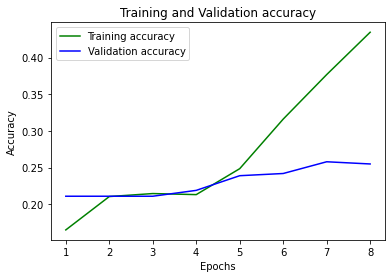

In [94]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

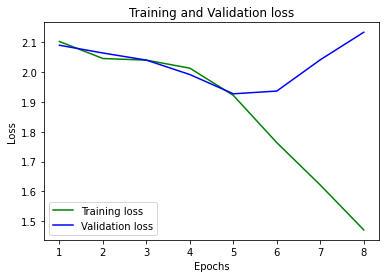

In [95]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
print("Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%")
print("Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%")

Training Accuracy: 43.46%
Validation Accuracy: 25.5%


In [97]:
predictions = model.predict(X_dev_w2v)

In [98]:
predictions = np.argmax(predictions, axis=1)

In [99]:
accuracy_score(y_dev, predictions)

0.255

## Testing 

### Weaker Baseline

In [100]:
model = KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=22,weights='distance')

In [101]:
model.fit(X_train_cv,y_train)

KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=22,
                     weights='distance')

In [102]:
y_pred_dev = model.predict(X_dev_cv)

In [103]:
print(classification_report(y_dev, y_pred_dev))

              precision    recall  f1-score   support

           1       0.31      0.55      0.39       211
           2       0.31      0.31      0.31       170
           3       0.19      0.05      0.08        77
           4       0.30      0.24      0.27       104
           5       0.38      0.36      0.37        97
           6       0.32      0.14      0.19        87
           7       0.23      0.20      0.21        96
           8       0.31      0.25      0.28       158

    accuracy                           0.30      1000
   macro avg       0.29      0.26      0.26      1000
weighted avg       0.30      0.30      0.29      1000



### Strong Baseline

In [104]:
model = svm.SVC(C=0.7, gamma='auto', kernel='linear')

In [105]:
model.fit(X_train_cv,y_train)

SVC(C=0.7, gamma='auto', kernel='linear')

In [106]:
y_pred_dev = model.predict(X_dev_cv)

In [107]:
print(classification_report(y_dev, y_pred_dev))

              precision    recall  f1-score   support

           1       0.31      0.59      0.41       211
           2       0.36      0.34      0.35       170
           3       0.22      0.14      0.17        77
           4       0.38      0.26      0.31       104
           5       0.41      0.37      0.39        97
           6       0.37      0.23      0.28        87
           7       0.28      0.18      0.22        96
           8       0.39      0.30      0.34       158

    accuracy                           0.34      1000
   macro avg       0.34      0.30      0.31      1000
weighted avg       0.35      0.34      0.33      1000



### Best Model 

In [108]:
model = MultinomialNB(fit_prior=False)

In [109]:
model.fit(X_train_tf,y_train)

MultinomialNB(fit_prior=False)

In [110]:
y_pred_dev = model.predict(X_dev_tf)

In [111]:
print(classification_report(y_dev, y_pred_dev))

              precision    recall  f1-score   support

           1       0.36      0.49      0.41       211
           2       0.40      0.42      0.41       170
           3       0.10      0.06      0.08        77
           4       0.38      0.35      0.36       104
           5       0.42      0.42      0.42        97
           6       0.28      0.28      0.28        87
           7       0.35      0.23      0.28        96
           8       0.37      0.33      0.35       158

    accuracy                           0.36      1000
   macro avg       0.33      0.32      0.32      1000
weighted avg       0.35      0.36      0.35      1000



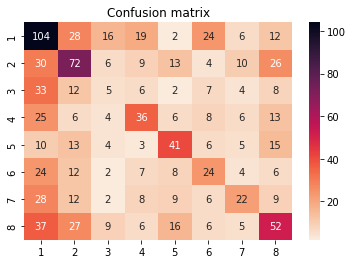

In [112]:
CM = confusion_matrix(y_dev,y_pred_dev)
target_names = ['1', '2','3','4','5','6','7','8']
ax = plt.axes()
sn.heatmap(CM, cmap='rocket_r',
           annot=True, 
           fmt='d',
           xticklabels=target_names, 
           yticklabels=target_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

### Test and Dev predictions 

#### Dev Dataset 

In [126]:
Dev_prev = pd.concat([df_dev['sentence'],pd.DataFrame(y_pred_dev, columns = ['emotion'])],axis = 1)
Dev_prev

,sentence,emotion
0,happens gold safe ?,4
1,natural get cold foot,4
2,lucky ?,5
3,little anxious get whoop et as,1
4,think know affair government official ?,1
...,...,...
995,ask careful,4
996,like jazz pal ?,8
997,put,1
998,ever imagine [person] spot like ?,7


In [128]:
Dev_prev.to_csv('dev_results.txt',sep= '\t', index=False)

### Test 

In [129]:
df_test = pd.read_csv('C:/Users/sarax/Desktop/tm/Project/test_set.txt', delimiter = "\t")
df_test.head()

,sentence
0,"Come , let's go get that automobile ."
1,"Well , some other time , then ?"
2,He's in trouble . Boy ?
3,Criminal gang unit to take control .
4,By Molto . No discussion . Interview .


In [130]:
test = pre_processing(df_test)
test

,sentence
0,come let go get automobile
1,well time ?
2,trouble boy ?
3,criminal gang unit take control
4,molto discussion interview
...,...
1995,let good
1996,hey looking good
1997,moved embassy hijacking ?
1998,!


In [131]:
X_train_tfidf = X_train.copy()
X_test_tfidf = test['sentence'].copy()

tfidf_vectorizer = TfidfVectorizer()

X_train_tf = tfidf_vectorizer.fit_transform(X_train_tfidf) 
X_test_tf = tfidf_vectorizer.transform(X_test_tfidf)

In [132]:
model = MultinomialNB(fit_prior=False)

In [133]:
model.fit(X_train_tf,y_train)

MultinomialNB(fit_prior=False)

In [134]:
y_pred_test = model.predict(X_test_tf)

In [135]:
y_pred_test

array([2, 1, 4, ..., 1, 1, 2], dtype=int64)

In [136]:
Test_prev = pd.concat([df_test['sentence'],pd.DataFrame(y_pred_test, columns = ['emotion'])],axis = 1)
Test_prev

,sentence,emotion
0,come let go get automobile,2
1,well time ?,1
2,trouble boy ?,4
3,criminal gang unit take control,8
4,molto discussion interview,7
...,...,...
1995,let good,2
1996,hey looking good,5
1997,moved embassy hijacking ?,1
1998,!,1


In [137]:
Test_prev.to_csv('test_results.txt',sep= '\t', index=False)